<a href="https://colab.research.google.com/github/lucasfelipecdm/fiap-hackathon-vision-guard/blob/main/fiap_hackathon_visionguard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install ultralytics
!pip install opencv-python
!pip install email_validator
!pip install yagmail

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 13.9 MB/s eta 0:00:00


In [39]:
# Import libraries
import os
import cv2
from ultralytics import YOLO
import yagmail
from email_validator import validate_email, EmailNotValidError
from google.colab.patches import cv2_imshow

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
from google.colab import userdata

In [45]:
# --- CONFIGURATION ---
# Path to your dataset (replace with your actual path)
dataset_path = '/content/drive/MyDrive/Colab Notebooks/fiap-hackathon-visionguard-content/dangerous-objects-dataset'  # Example: /content/drive/MyDrive/yolov8_dataset

# Path to your video (replace with your actual path)
video_path = '/content/drive/MyDrive/Colab Notebooks/fiap-hackathon-visionguard-content/test-video/video-test-1.mp4'  # Example: /content/drive/MyDrive/video.mp4
video_path2 = '/content/drive/MyDrive/Colab Notebooks/fiap-hackathon-visionguard-content/test-video/video-test-2.mp4'  # Example: /content/drive/MyDrive/video.mp4

# Email configuration (replace with your credentials)
SENDER_EMAIL = userdata.get('GMAIL_EMAIL')  # Your Gmail address
SENDER_PASSWORD = userdata.get('GMAIL_PASSWORD')  # Your Gmail password or App Password (recommended)
RECEIVER_EMAIL = "lucasfelipecdm@hotmail.com" # Recipient email address

# Classes to detect (adjust if needed)
CLASSES_TO_DETECT = ['0', '1', 'Knife', 'Person', 'Pistol', 'knife']  # Match your dataset's classes

In [42]:
# --- FUNCTIONS ---

def train_model(dataset_path):
    """Trains the YOLOv8 model."""
    model = YOLO('yolov8m.pt')  # You can change to a larger model like yolov8s.pt, yolov8m.pt, etc. for better accuracy if needed
    model.train(data=os.path.join(dataset_path, 'data.yaml'), epochs=10)  # Adjust epochs as needed
    return model

def detect_objects(model, video_path):
    """Detects objects in the video and sends an email if any are found."""
    cap = cv2.VideoCapture(video_path)
    object_detected = False

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)

        for result in results:
            boxes = result.boxes
            for box in boxes:
                class_id = int(box.cls[0])
                class_name = model.names[class_id]
                if class_name in CLASSES_TO_DETECT:
                    object_detected = True
                    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get box coordinates
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
                    cv2.putText(frame, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Add label

        cv2_imshow(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'): # Press 'q' to quit
            break

    cap.release()
    cv2.destroyAllWindows()

    return object_detected


def send_email(object_detected):
    """Sends an email notification."""
    if object_detected:
         try:
            # Validate email addresses
            validated_sender = validate_email(SENDER_EMAIL)
            validated_receiver = validate_email(RECEIVER_EMAIL)

            # Use validated and normalized email addresses
            sender_email = validated_sender["email"]
            receiver_email = validated_receiver["email"]

            yag = yagmail.SMTP(user=sender_email, password=SENDER_PASSWORD)
            contents = ["Sharps objects detected in the video!"]  # Email content
            yag.send(to=receiver_email, subject="Sharps Object Detection Alert", contents=contents)
            print("Email sent successfully!")

         except EmailNotValidError as e:
            print(f"Invalid email address: {e}")
         except Exception as e:
             print(f"Error sending email: {e}")
    else:
        print("No sharps objects detected.")

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:254: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:259: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati


0: 384x640 (no detections), 25.9ms
Speed: 2.2ms preprocess, 25.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


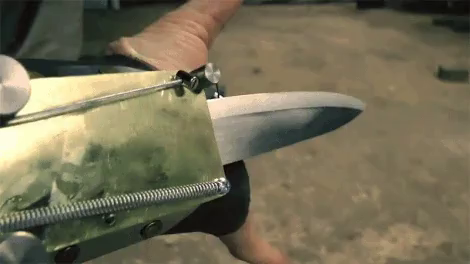


0: 384x640 (no detections), 25.6ms
Speed: 2.5ms preprocess, 25.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


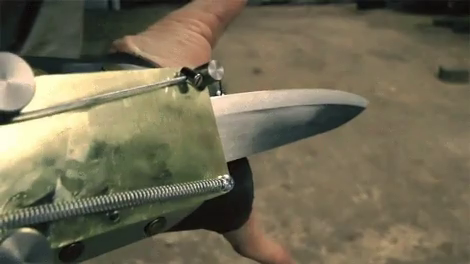


0: 384x640 (no detections), 25.1ms
Speed: 2.5ms preprocess, 25.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


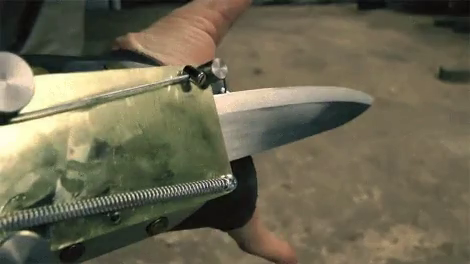


0: 384x640 (no detections), 25.1ms
Speed: 3.2ms preprocess, 25.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


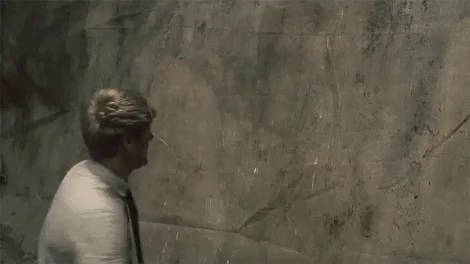


0: 384x640 (no detections), 25.2ms
Speed: 2.5ms preprocess, 25.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


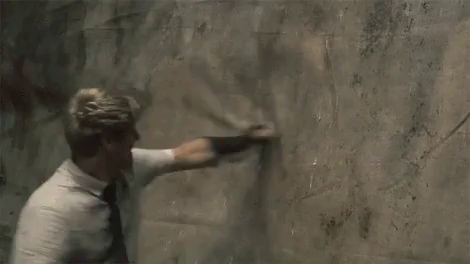


0: 384x640 (no detections), 25.2ms
Speed: 4.5ms preprocess, 25.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


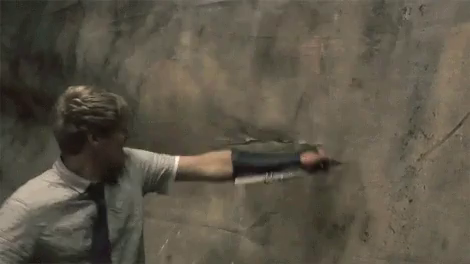


0: 384x640 (no detections), 25.1ms
Speed: 2.5ms preprocess, 25.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


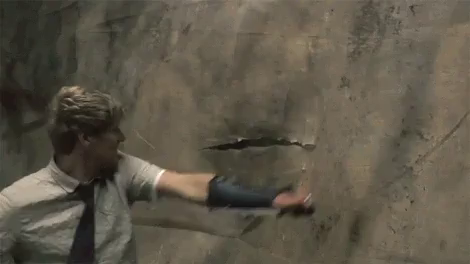


0: 384x640 (no detections), 25.0ms
Speed: 2.6ms preprocess, 25.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


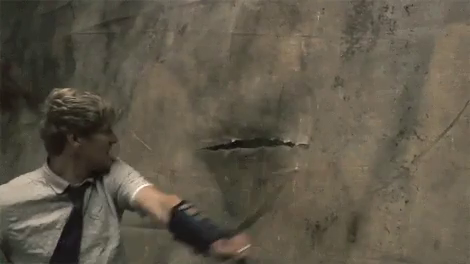


0: 384x640 (no detections), 22.7ms
Speed: 3.5ms preprocess, 22.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


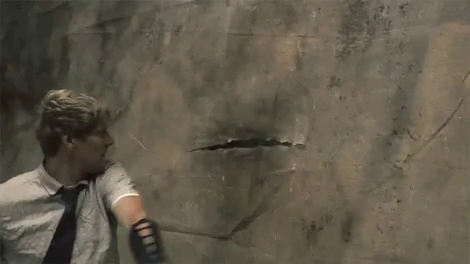


0: 384x640 (no detections), 22.6ms
Speed: 2.5ms preprocess, 22.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


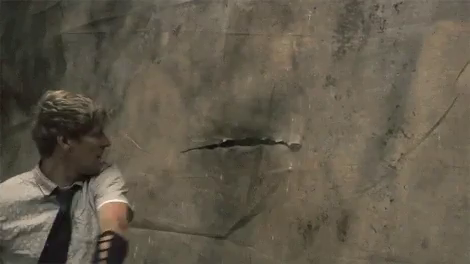


0: 384x640 (no detections), 22.7ms
Speed: 2.9ms preprocess, 22.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


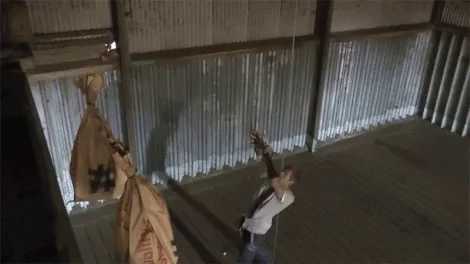


0: 384x640 (no detections), 22.7ms
Speed: 3.0ms preprocess, 22.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


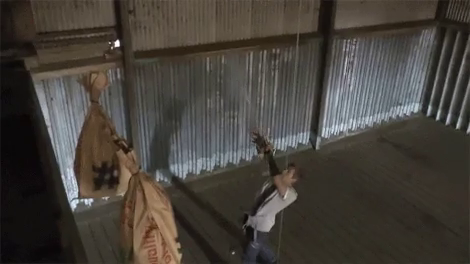


0: 384x640 (no detections), 23.5ms
Speed: 4.7ms preprocess, 23.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


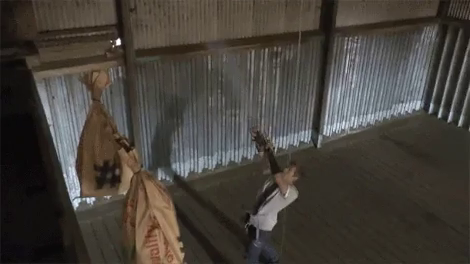


0: 384x640 (no detections), 22.7ms
Speed: 2.5ms preprocess, 22.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


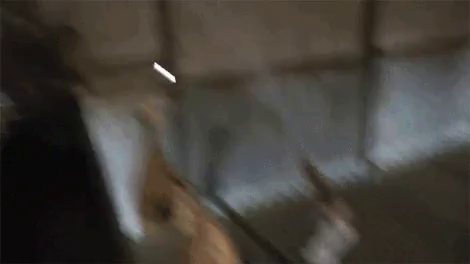


0: 384x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


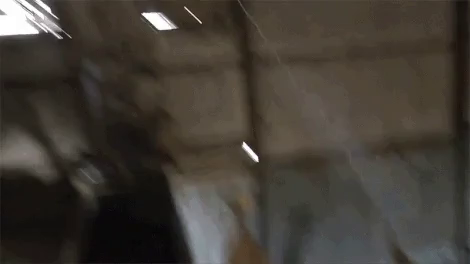


0: 384x640 (no detections), 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


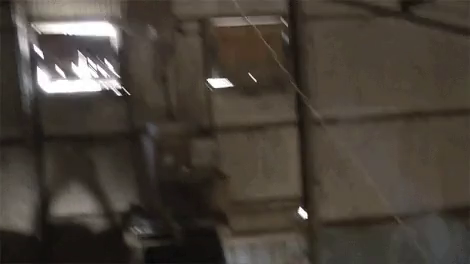


0: 384x640 (no detections), 22.6ms
Speed: 4.4ms preprocess, 22.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


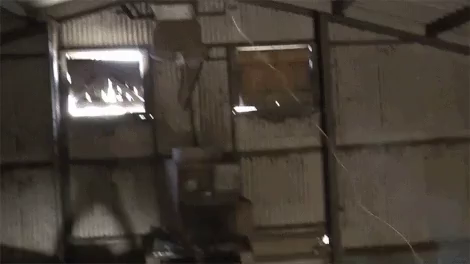


0: 384x640 (no detections), 22.6ms
Speed: 3.0ms preprocess, 22.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


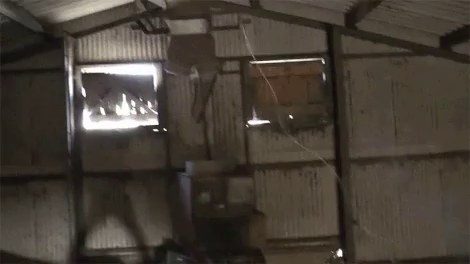


0: 384x640 (no detections), 22.6ms
Speed: 2.5ms preprocess, 22.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


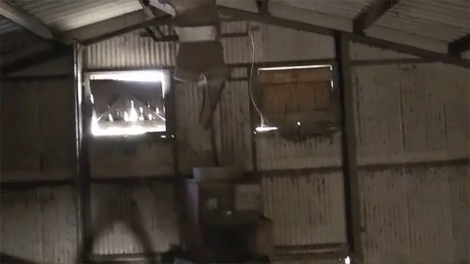


0: 384x640 (no detections), 25.0ms
Speed: 2.6ms preprocess, 25.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


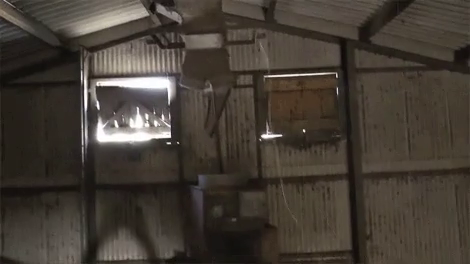


0: 384x640 (no detections), 22.7ms
Speed: 2.5ms preprocess, 22.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


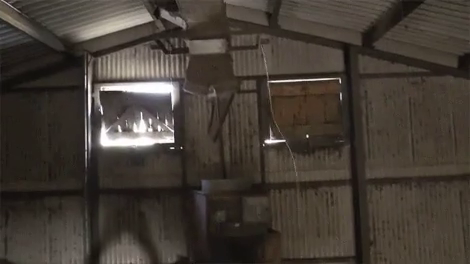


0: 384x640 (no detections), 22.7ms
Speed: 2.6ms preprocess, 22.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


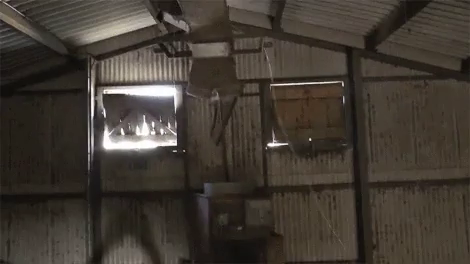


0: 384x640 (no detections), 22.6ms
Speed: 2.6ms preprocess, 22.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


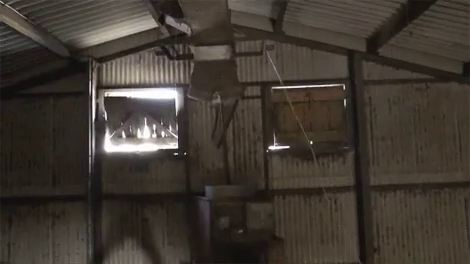


0: 384x640 (no detections), 22.7ms
Speed: 2.6ms preprocess, 22.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


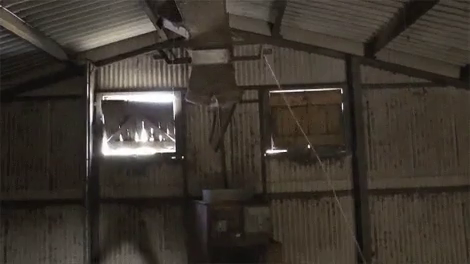


0: 384x640 (no detections), 22.6ms
Speed: 2.5ms preprocess, 22.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


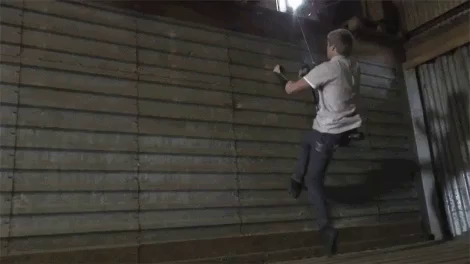


0: 384x640 (no detections), 22.6ms
Speed: 6.3ms preprocess, 22.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


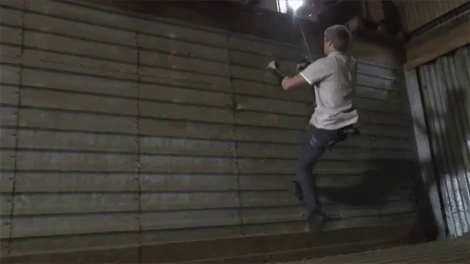


0: 384x640 (no detections), 22.6ms
Speed: 2.5ms preprocess, 22.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


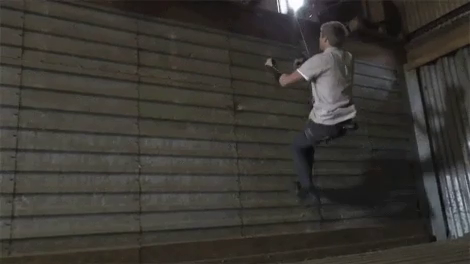


0: 384x640 (no detections), 22.6ms
Speed: 2.5ms preprocess, 22.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


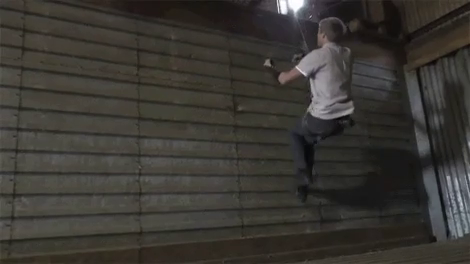


0: 384x640 (no detections), 22.6ms
Speed: 2.6ms preprocess, 22.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


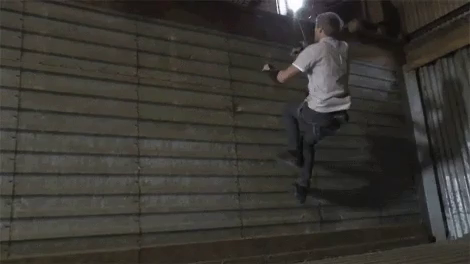


0: 384x640 (no detections), 22.7ms
Speed: 2.5ms preprocess, 22.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


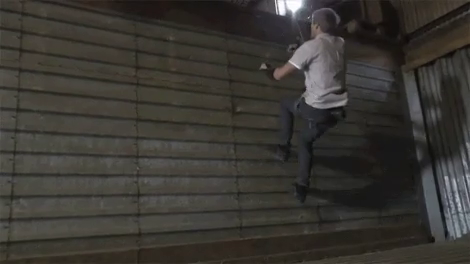


0: 384x640 (no detections), 22.6ms
Speed: 2.7ms preprocess, 22.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


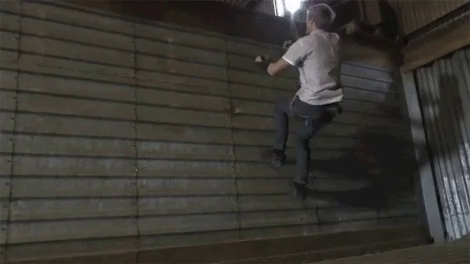


0: 384x640 (no detections), 22.7ms
Speed: 3.3ms preprocess, 22.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


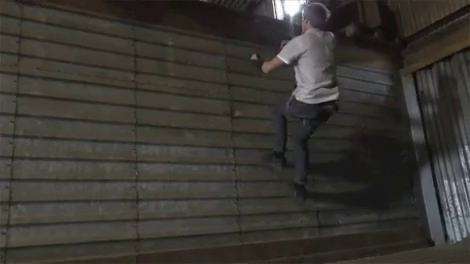


0: 384x640 (no detections), 22.7ms
Speed: 3.3ms preprocess, 22.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


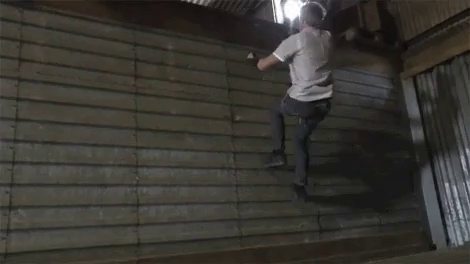


0: 384x640 (no detections), 22.7ms
Speed: 2.5ms preprocess, 22.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


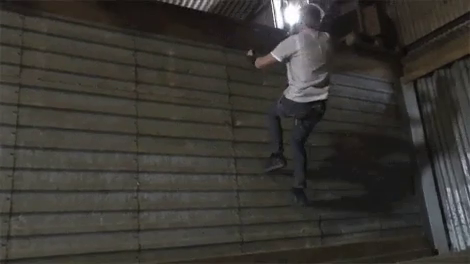


0: 384x640 (no detections), 22.6ms
Speed: 2.7ms preprocess, 22.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


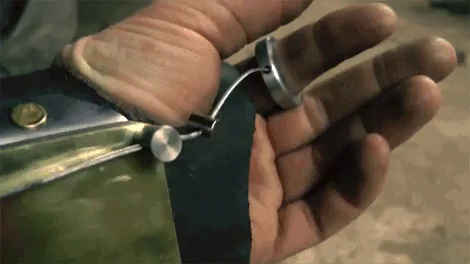


0: 384x640 (no detections), 22.7ms
Speed: 2.7ms preprocess, 22.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


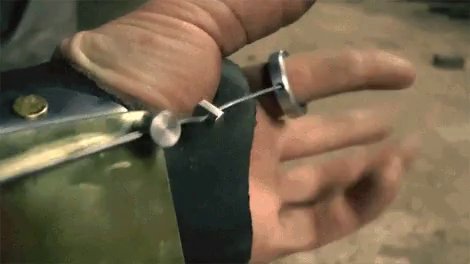


0: 384x640 (no detections), 23.6ms
Speed: 2.6ms preprocess, 23.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


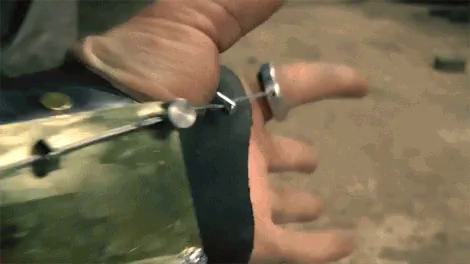


0: 384x640 (no detections), 24.1ms
Speed: 2.5ms preprocess, 24.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


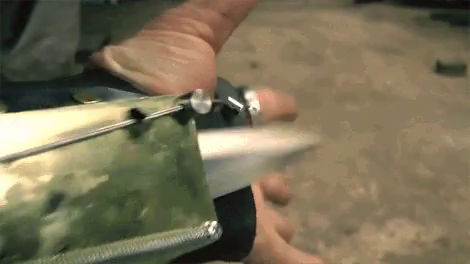


0: 384x640 1 1, 23.6ms
Speed: 6.9ms preprocess, 23.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


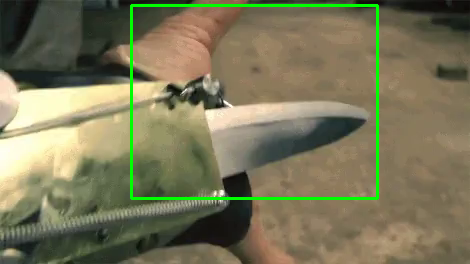

True


<ipython-input-42-2131d289c01d>:51: DeprecationWarning: dict-like access to the return value of validate_email is deprecated and may not be supported in the future.
  sender_email = validated_sender["email"]
<ipython-input-42-2131d289c01d>:52: DeprecationWarning: dict-like access to the return value of validate_email is deprecated and may not be supported in the future.
  receiver_email = validated_receiver["email"]


Error sending email: (534, b'5.7.9 Application-specific password required. For more information, go to\n5.7.9  https://support.google.com/mail/?p=InvalidSecondFactor d9443c01a7336-220d5349056sm3019975ad.22 - gsmtp')
Finished.


In [46]:
# --- MAIN EXECUTION ---

# 1. Train the model (uncomment if you need to retrain)
# model = train_model(dataset_path)
# model.save(os.path.join(dataset_path, 'best.pt')) # Save the trained model

# 2. Load the trained model
model = YOLO(os.path.join(dataset_path, 'best.pt'))  # Load the trained model. Make sure the 'best.pt' file is in the correct directory.

# 3. Detect objects in the video
object_detected = detect_objects(model, video_path2)

print(object_detected)
# 4. Send email notification
send_email(object_detected)

print("Finished.")